In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
from __future__ import print_function

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [5]:
# %load assignment1.py
#
# TOOD: Import whatever needs to be imported to make this work
#
# .. your code here ..


matplotlib.style.use('ggplot') # Look Pretty

In [6]:
#
# TODO: To procure the dataset, follow these steps:
# 1. Navigate to: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
# 2. In the 'Primary Type' column, click on the 'Menu' button next to the info button,
#    and select 'Filter This Column'. It might take a second for the filter option to
#    show up, since it has to load the entire list first.
# 3. Scroll down to 'GAMBLING'
# 4. Click the light blue 'Export' button next to the 'Filter' button, and select 'Download As CSV'

def doKMeans(df):
    #
    # INFO: Plot your data with a '.' marker, with 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    #
    # TODO: Filter df so that you're only looking at Longitude and Latitude,
    # since the remaining columns aren't really applicable for this purpose.
    #
    # .. your code here ..
    longlat = df[['Longitude','Latitude']]
    #
    # TODO: Use K-Means to try and find seven cluster centers in this df.
    #
    # .. your code here ..
    kmeans_model = KMeans(n_clusters=7)
    kmeans_model.fit(longlat)
    print ("kmeans_model intertia_ = {}".format(kmeans_model.inertia_))
    #
    # INFO: Print and plot the centroids...
    centroids = kmeans_model.cluster_centers_
    print ("Centroids: {}".format(centroids))
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    print (centroids)

In [7]:
#
# TODO: Load your dataset after importing Pandas
#
# .. your code here ..
#
# Read my fixed-up version
# crime = pd.read_csv('Datasets/Crimes_-_2001_to_present.csv.crdownload')
crime = pd.read_csv('Datasets/ChicagoGamblingCrimes.csv')

In [8]:
crime.shape

(13990, 22)

In [9]:
#
# TODO: Drop any ROWs with nans in them
#
# .. your code here ..
#
# Read my fixed up version with datetime

# crime = crime.dropna(axis=0)
crime = crime.dropna(axis=0)

In [10]:
crime.shape

(12776, 22)

In [11]:
#
# TODO: Print out the dtypes of your dset
#
# .. your code here ..
col_types = pd.DataFrame({'Column':crime.columns.tolist(), 'Type':[crime[c].dtype for c in crime.columns]})
col_types

Column     Type
0                     ID    int64
1            Case Number   object
2                   Date   object
3                  Block   object
4                   IUCR    int64
5           Primary Type   object
6            Description   object
7   Location Description   object
8                 Arrest     bool
9               Domestic     bool
10                  Beat    int64
11              District    int64
12                  Ward  float64
13        Community Area  float64
14              FBI Code    int64
15          X Coordinate  float64
16          Y Coordinate  float64
17                  Year    int64
18            Updated On   object
19              Latitude  float64
20             Longitude  float64
21              Location   object

In [12]:
#
# Coerce the 'Date' feature (which is currently a string object) into real date,
# and confirm by re-printing the dtypes. NOTE: This is a slow process...
#
# .. your code here ..
crime.loc[0,'Date']

'02/09/2006 10:29:07 PM'

In [13]:
pd.to_datetime('01/14/2004 10:00:00 PM', format="%m/%d/%Y %I:%M:%S %p")

Timestamp('2004-01-14 22:00:00')

### NOTE: Use `%I` for hour instead of `%H` so that the `%p` for AM/PM will convert hour to 24-hour form


In [14]:
crime.Date = pd.to_datetime(crime.Date, format="%m/%d/%Y %I:%M:%S %p")
crime.Date.dtype

dtype('<M8[ns]')

In [15]:
# crime.to_csv('crime_with_datetime.csv', index=False)

In [16]:
crime.head()

ID Case Number                Date                    Block  IUCR  \
0  4647776    HM172874 2006-02-09 22:29:07       075XX S COLFAX AVE  1661   
1  4649196    HM157167 2006-02-01 12:30:27     038XX W FERDINAND ST  1661   
2  4649661    HM159623 2006-02-02 19:02:12      050XX W SUPERIOR ST  1661   
3  4650448    HM158020 2006-02-01 20:13:00  056XX W WASHINGTON BLVD  1661   
4  4650940    HM156984 2006-02-01 10:10:00          015XX W 72ND ST  1661   

  Primary Type Description     Location Description Arrest Domestic  \
0     GAMBLING   GAME/DICE                 SIDEWALK   True    False   
1     GAMBLING   GAME/DICE                 SIDEWALK   True    False   
2     GAMBLING   GAME/DICE                 SIDEWALK   True    False   
3     GAMBLING   GAME/DICE  RESIDENCE PORCH/HALLWAY   True    False   
4     GAMBLING   GAME/DICE                 SIDEWALK   True    False   

               ...                Ward  Community Area  FBI Code  \
0              ...                 7.0            43.0        19   
1              ...                27.0            23.0        19   
2              ...                28.0            25.0        19   
3              ...                29.0            25.0        19   
4              ...                17.0            67.0        19   

   X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0     1194833.0     1855572.0  2006  04/15/2016 08:55:02 AM  41.758607   
1     1150871.0     1903067.0  2006  04/15/2016 08:55:02 AM  41.889909   
2     1142605.0     1904502.0  2006  04/15/2016 08:55:02 AM  41.894005   
3     1138430.0     1900175.0  2006  04/15/2016 08:55:02 AM  41.882208   
4     1167231.0     1856980.0  2006  04/15/2016 08:55:02 AM  41.763106   

   Longitude                       Location  
0 -87.561511  (41.758607126, -87.561510616)  
1 -87.721389  (41.889909247, -87.721389051)  
2 -87.751710   (41.89400481, -87.751710086)  
3 -87.767149  (41.882207608, -87.767148598)  
4 -87.662629   (41.763105901, -87.66262925)  

[5 rows x 22 columns]

In [17]:
# Need to drop outliers
lat_mean = crime.Latitude.mean()
lat_std = crime.Latitude.std()
long_mean = crime.Longitude.mean()
long_std = crime.Longitude.std()
print (lat_mean)
print (lat_std)
print (long_mean)
print (long_std)

41.8300529862
0.0742494415431
-87.6799017054
0.0581416843528


In [18]:
crime = crime[abs(crime.Longitude - long_mean) < 4*long_std]

In [19]:
crime.shape

(12776, 22)

In [20]:
crime = crime[abs(crime.Latitude - lat_mean) < 4*lat_std]

In [21]:
crime.shape

(12776, 22)

kmeans_model intertia_ = 9.2355270483
Centroids: [[-87.75691578  41.89345741]
 [-87.61938212  41.80288389]
 [-87.684885    41.98183762]
 [-87.58223785  41.75230099]
 [-87.70955546  41.87815241]
 [-87.63121002  41.69664674]
 [-87.6647847   41.77287251]]
[[-87.75691578  41.89345741]
 [-87.61938212  41.80288389]
 [-87.684885    41.98183762]
 [-87.58223785  41.75230099]
 [-87.70955546  41.87815241]
 [-87.63121002  41.69664674]
 [-87.6647847   41.77287251]]


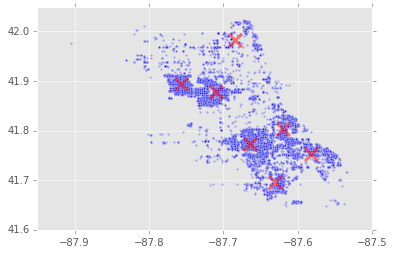

In [22]:
# INFO: Print & Plot your data
doKMeans(crime)

In [23]:
#
# TODO: Filter out the data so that it only contains samples that have
# a Date > '2011-01-01', using indexing. Then, in a new figure, plot the
# crime incidents, as well as a new K-Means run's centroids.
#
# .. your code here ..

df = crime[crime.Date > pd.to_datetime('2011-01-01')]

In [24]:
df.shape

(2903, 22)

kmeans_model intertia_ = 1.5512382191
Centroids: [[-87.66410862  41.77637403]
 [-87.75477678  41.89004741]
 [-87.68522419  41.98536496]
 [-87.6348694   41.70541264]
 [-87.71054325  41.87507812]
 [-87.5800812   41.75075911]
 [-87.61790418  41.79208136]]
[[-87.66410862  41.77637403]
 [-87.75477678  41.89004741]
 [-87.68522419  41.98536496]
 [-87.6348694   41.70541264]
 [-87.71054325  41.87507812]
 [-87.5800812   41.75075911]
 [-87.61790418  41.79208136]]


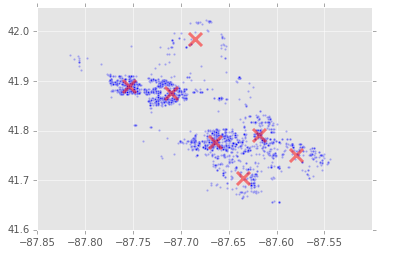

In [25]:
# INFO: Print & Plot your data
doKMeans(df)
plt.show()